In [126]:
import numpy as np
from numpy import genfromtxt
from scipy import signal as sgl
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd 

mpl.rcParams['font.size'] = 20

path_to_par_input = "./C_implementation_attempt/Simulations/Input_parameters/"
path_to_sim_output = "./C_implementation_attempt/Simulations/Output_timeseries/"

parameters_original = np.array([1.6000e+01, 1.2000e+01, 1.5000e+01, 3.0000e+00, 8.0000e+00, 8.0000e+00,
        1.3000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 3.7000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.500e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,5.0000e-07,5.0000e-07])

parameters_alpha_peak = np.array([1.6000e+01, 1.2000e+01, 1.5000e+01, 3.0000e+00, 28.0000e+00, 28.0000e+00,
        1.3000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 3.7000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.500e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,5.0000e-07,5.0000e-07])

In [127]:
dt = 1.0
parameter_sample = np.array([parameters_alpha_peak for i in range(1500)])
pd.DataFrame(parameter_sample).to_csv(f"{path_to_par_input}parameters.csv", header=None, index=None, float_format="%10.16f")
settings = np.array([[302.0,dt,20.0]])
pd.DataFrame(settings).to_csv(f"{path_to_par_input}settings.csv", header=None, index=None, float_format="%10.16f")

In [128]:
# Surprisingly the C code is slower: 9.65 seconds to run 20 simulations of length 302s with dt of 1.0ms
time_series_E = genfromtxt(f'{path_to_sim_output}simulation_testE.csv', delimiter=',').T
time_series_I = genfromtxt(f'{path_to_sim_output}simulation_testI.csv', delimiter=',').T
t = np.arange(int(1000/dt))*1
print(time_series_E.shape)

(302001, 20)


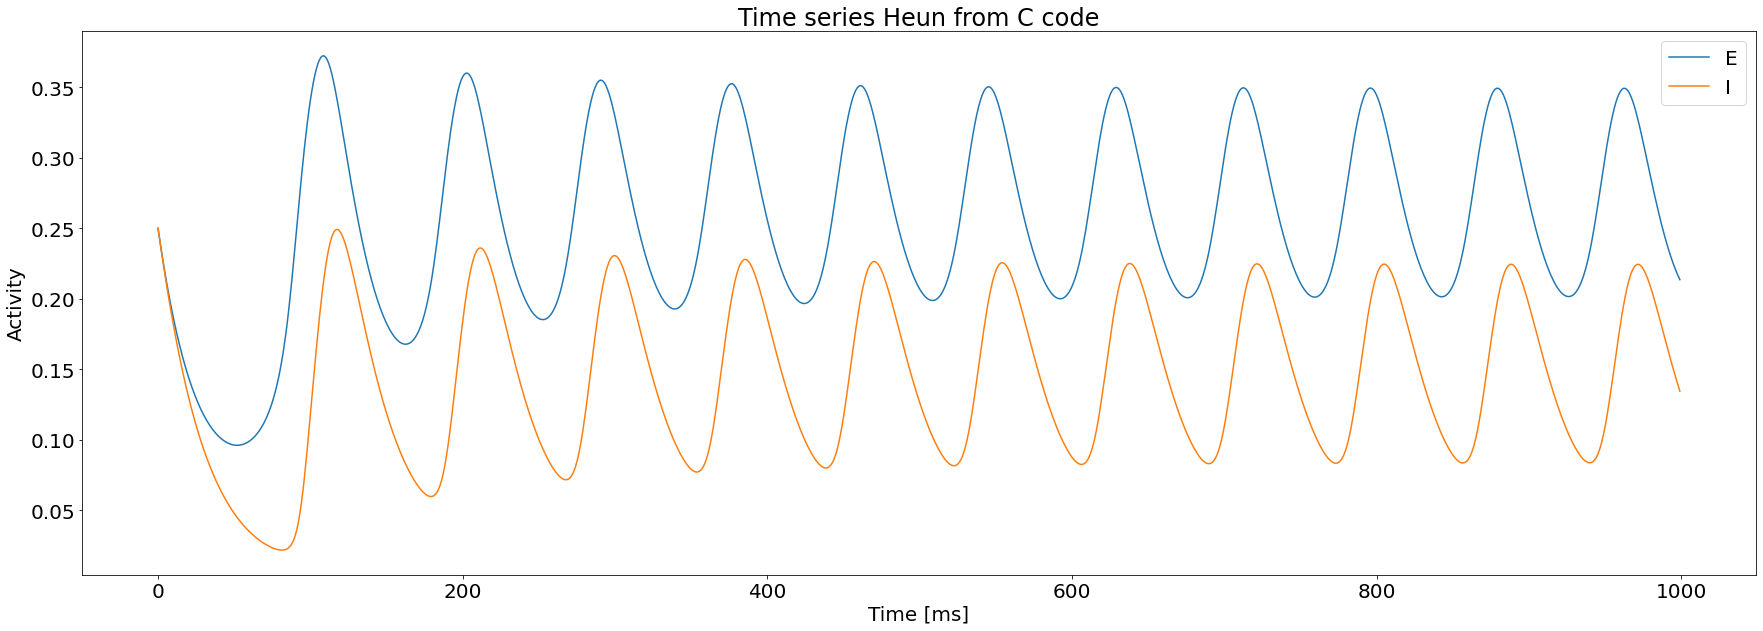

In [129]:
# Plot
f = plt.figure(figsize=(30,10))
# Timeseries
ax = plt.subplot(1,1,1)
ax.plot(t,time_series_E[:int(1000/dt),0], label = "E")
ax.plot(t,time_series_I[:int(1000/dt),0], label = "I")
plt.xlabel('Time [ms]')
plt.ylabel('Activity')
plt.title('Time series Heun from C code')
plt.legend()